In [11]:
#importing all the required modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv('clened_dataset.csv')
df = df.drop(columns=['Unnamed: 0'], axis=1)
df.head()

,ID,Name,Sex,Age,Team,Games,Year,Season,Sport,Medal,Host,GDP,Population
0,31,Jyri Tapani Aalto,M,31.0,Finland,2000 Summer,2000,Summer,Badminton,0,Australia,3268977.0,5176209.0
1,578,Zarinah Abdullah,F,21.0,Singapore,1992 Summer,1992,Summer,Badminton,0,Spain,2477557.0,3228231.0
2,579,Zarinah Abdullah,F,25.0,Singapore,1996 Summer,1996,Summer,Badminton,0,United States,32724488.0,3651903.0
3,757,Pablo Abin Vicen,M,23.0,Spain,2008 Summer,2008,Summer,Badminton,0,China,32844324.0,45966538.0
4,758,Pablo Abin Vicen,M,27.0,Spain,2012 Summer,2012,Summer,Badminton,0,United Kingdom,30645215.0,46756082.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1542 non-null   int64  
 1   Name        1542 non-null   object 
 2   Sex         1542 non-null   object 
 3   Age         1542 non-null   float64
 4   Team        1542 non-null   object 
 5   Games       1542 non-null   object 
 6   Year        1542 non-null   int64  
 7   Season      1542 non-null   object 
 8   Sport       1542 non-null   object 
 9   Medal       1542 non-null   int64  
 10  Host        1542 non-null   object 
 11  GDP         1542 non-null   float64
 12  Population  1542 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 156.7+ KB


In [14]:
#evaluates number of medals won by host countries
medals_country = df[(df.Medal.notnull()) & (df.Team==df.Host)]['Host']
medals_count = medals_country.value_counts()

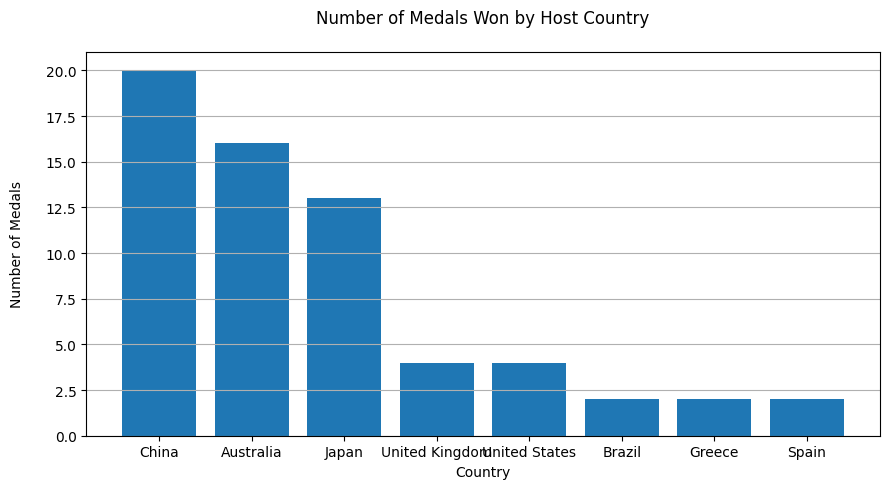

In [15]:
# plotting my results
plt.figure(figsize=(9,5))
plt.bar(medals_count.index, medals_count)
plt.xlabel('Country')
plt.ylabel('Number of Medals\n')
plt.title('Number of Medals Won by Host Country\n') 
plt.tight_layout()
plt.grid(axis='y')

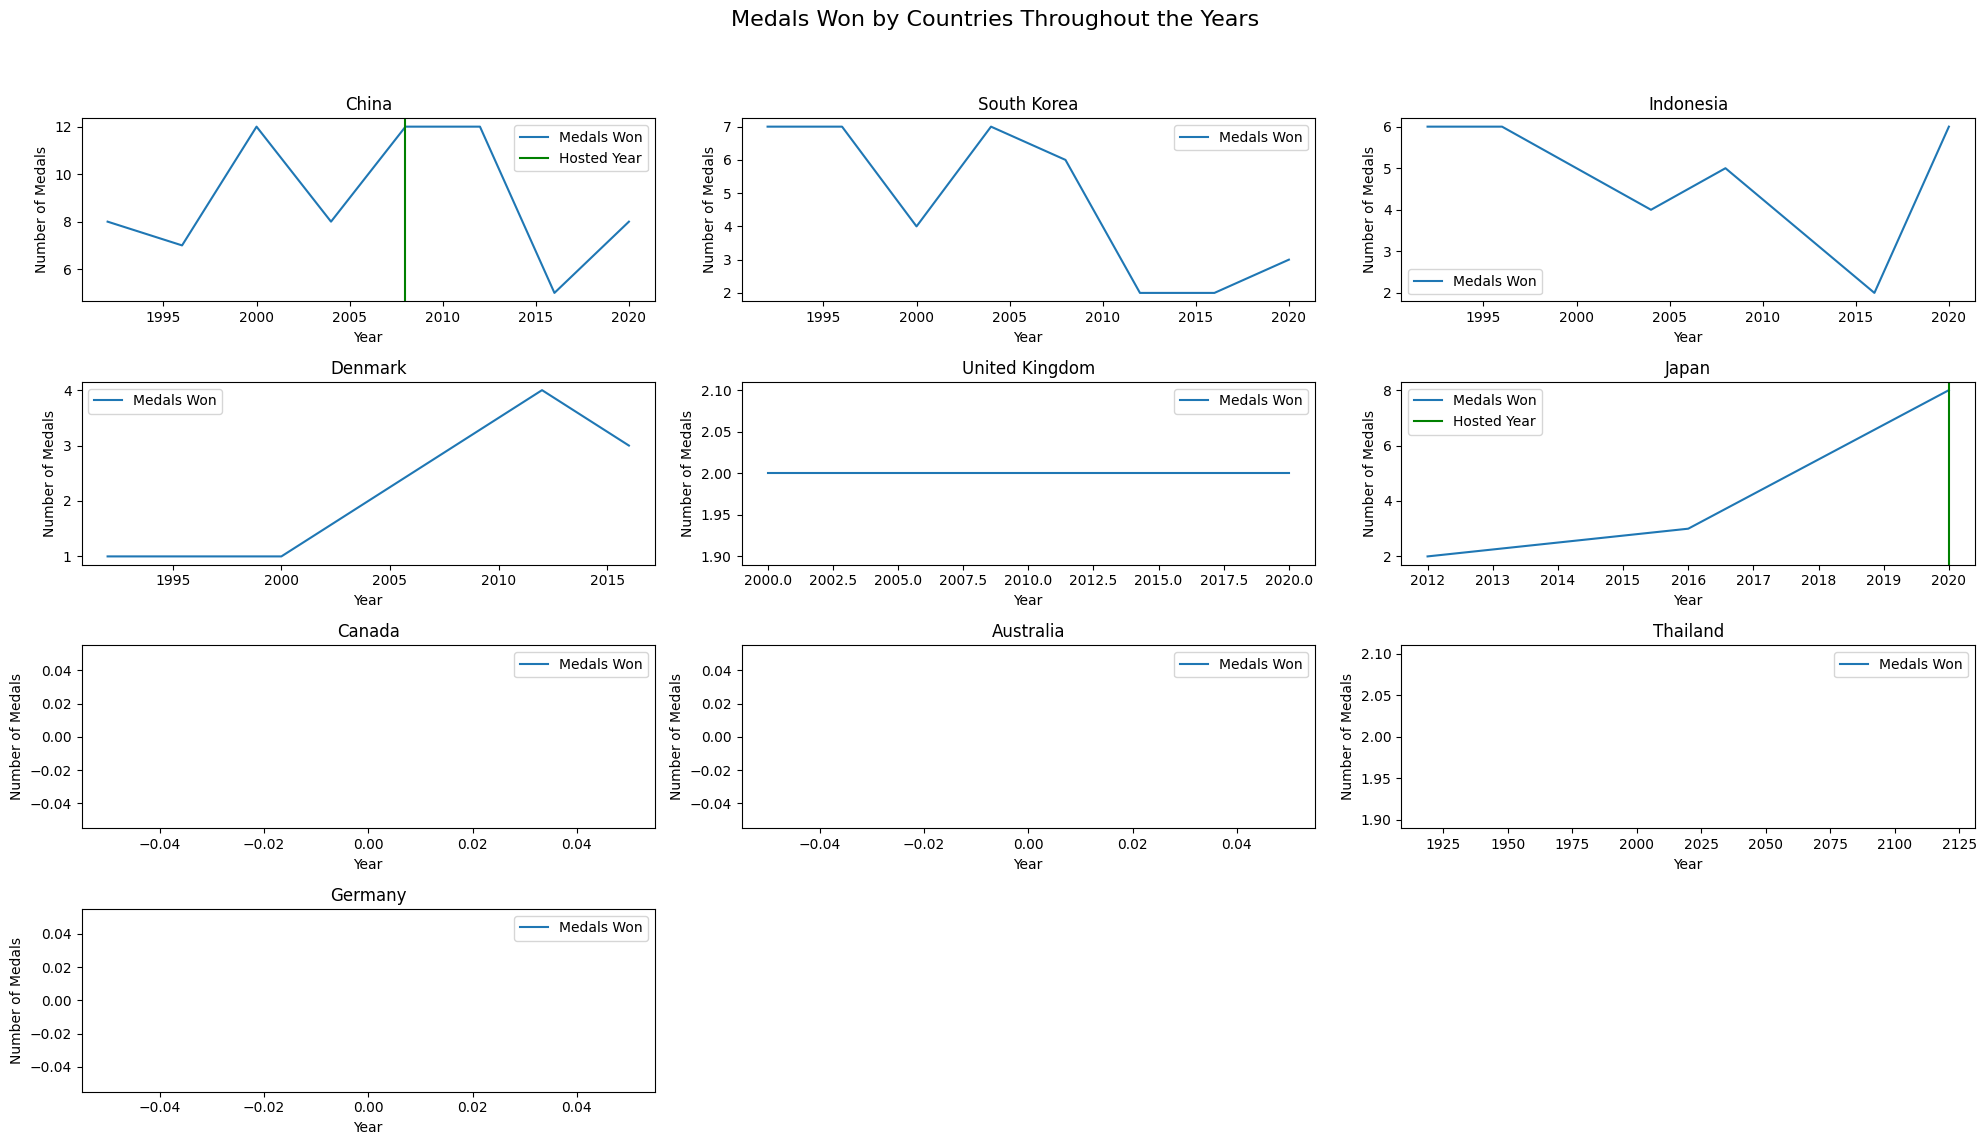

In [16]:

# Calculate medals won by the top 10 countries
top_countries = df['Team'].value_counts().head(10).index

plt.figure(figsize=(20, 12))
plt.suptitle('Medals Won by Countries Throughout the Years', fontsize=16)
x = 1
for country in top_countries:
    plt.subplot(4, 3, x)  # Change the grid to 4x3 to accommodate 10 subplots
    medals = df[(df['Medal'] > 0) & (df['Team'] == country) & (df['Season'] == 'Summer')]['Year']
    medals = medals.value_counts().sort_index()  # Counts number of medals for each country each year

    host_years = df[(df['Medal'] > 0) & (df['Team'] == country) & (df['Season'] == 'Summer') & (df['Host'] == country)]['Year']
    host_years = host_years.drop_duplicates()  # Evaluating the years each country hosted the Olympics

    # Plotting the results
    plt.plot(medals.index, medals, label='Medals Won')
    plt.xlabel('Year')
    plt.ylabel('Number of Medals')
    plt.title(country)
    for year in host_years:
        plt.axvline(x=year, label='Hosted Year', color='green')  # Lists all the host years
    plt.legend()
    x += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


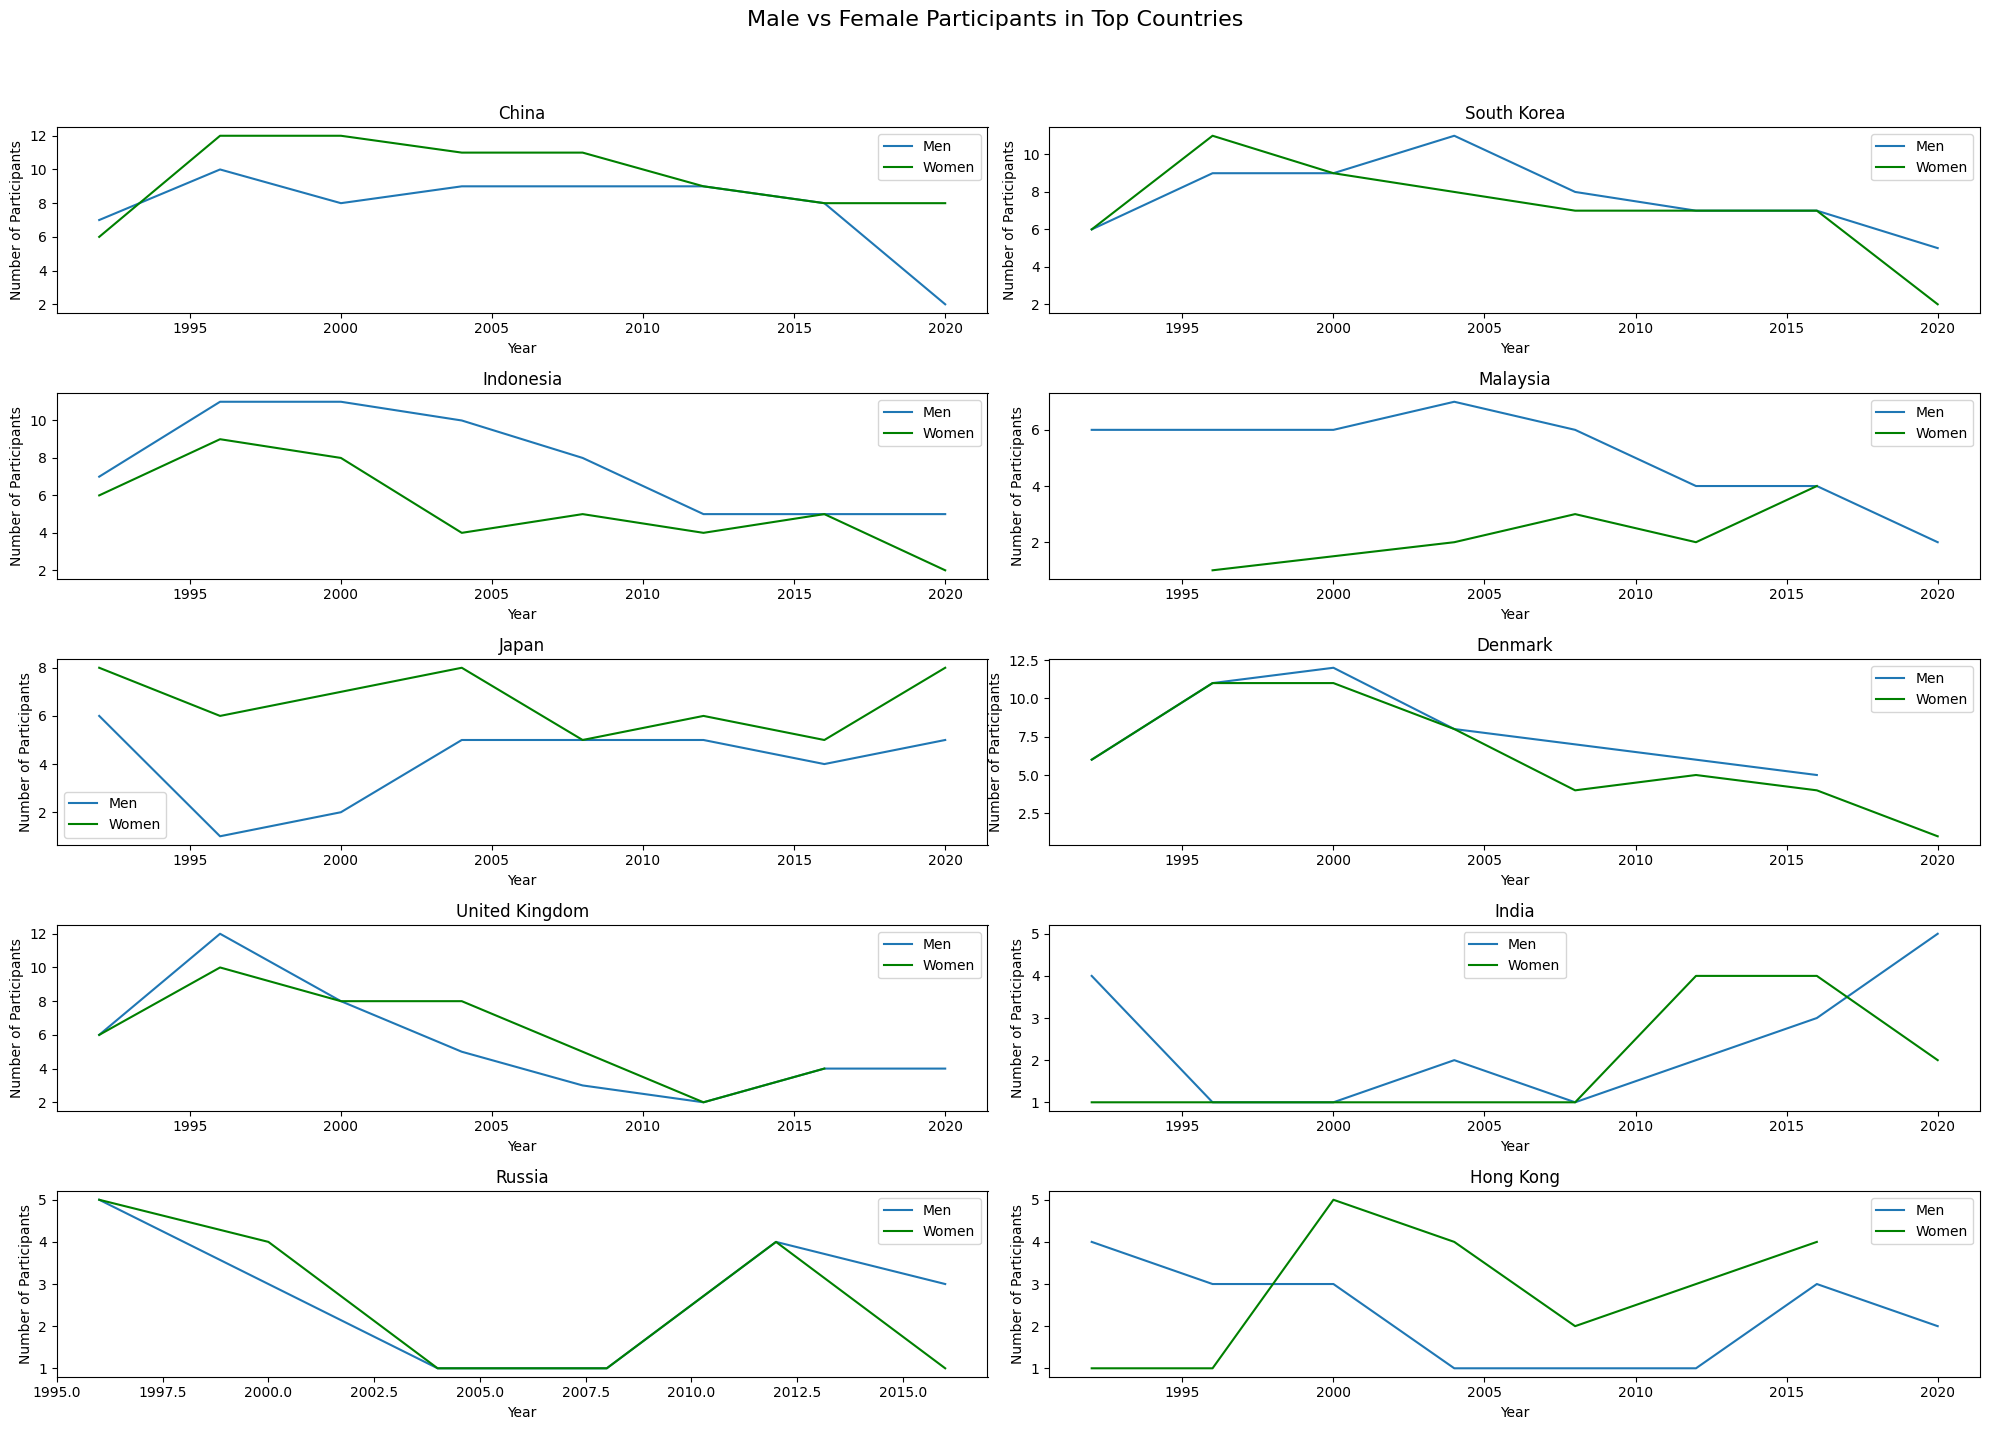

In [17]:
# Calculate the number of participants for each country, including 'United Kingdom'
country_list = df[df['Medal'] > 0]['Team']
country_list = country_list.value_counts().sort_values(ascending=False)  # Descending order of medal counts
country_list = country_list.iloc[:10]  # Top 10 countries

# Plotting the results
plt.figure(figsize=(20, 15))
plt.suptitle('Male vs Female Participants in Top Countries', fontsize=16)
x = 1
for country in country_list.index:
    plt.subplot(5, 2, x)  # Adjust grid to 4x3 to accommodate 10 subplots
    men_country = df[(df['Team'] == country) & (df['Sex'] == 'M') & (df['Season'] == 'Summer')].groupby('Year').count()
    women_country = df[(df['Team'] == country) & (df['Sex'] == 'F') & (df['Season'] == 'Summer')].groupby('Year').count()
    
    # Plotting male and female participants
    plt.plot(men_country.index, men_country['ID'], label='Men')
    plt.plot(women_country.index, women_country['ID'], 'g', label='Women')
    plt.xlabel('Year')
    plt.ylabel('Number of Participants')
    plt.title(country)
    plt.legend()
    x += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


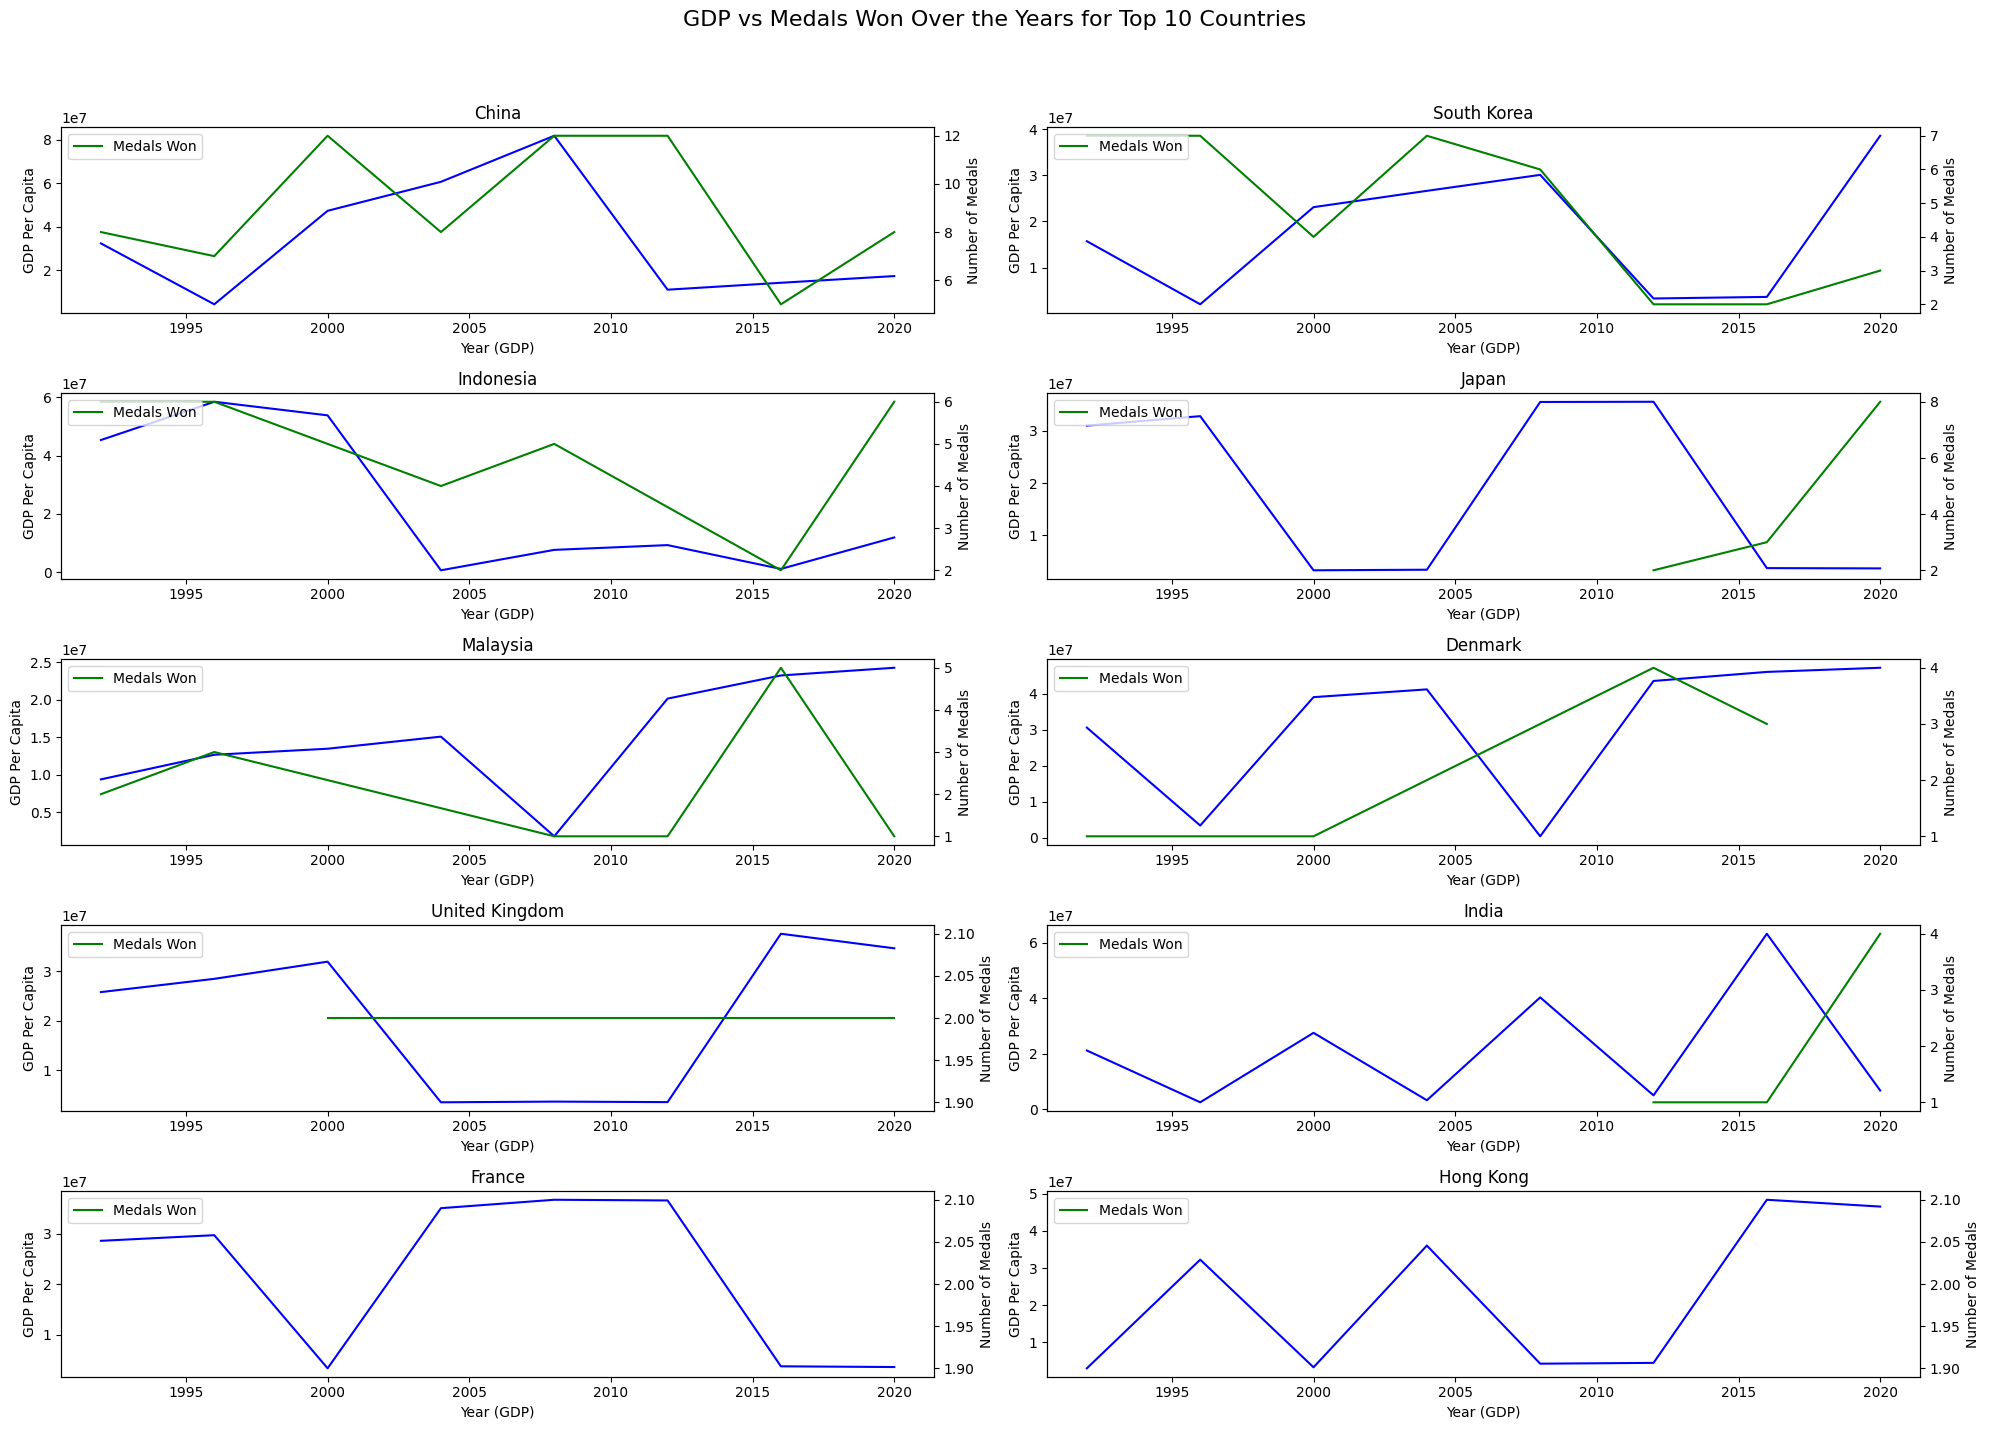

In [18]:
# Calculate the total number of medals for each country
medal_counts = df[df['Medal'] > 0].groupby('Team')['Medal'].count().reset_index()
medal_counts.columns = ['Team', 'Total_Medals']

# Select the top 10 countries by total medal counts
top_countries = medal_counts.sort_values(by='Total_Medals', ascending=False).iloc[:10]['Team']

# Plot the results
plt.figure(figsize=(20, 15))
plt.suptitle('GDP vs Medals Won Over the Years for Top 10 Countries', fontsize=16)
x = 1
for country in top_countries:
    plt.subplot(5, 2, x)  # Adjust grid to 5x2 to accommodate 10 subplots
    country_data = df[df['Team'] == country]
    
    # Calculate the number of medals won each year
    medals_per_year = country_data[country_data['Medal'] > 0].groupby('Year')['Medal'].count()
    
    # Get the GDP data for each year
    gdp_per_year = country_data.groupby('Year')['GDP'].mean()
    
    # Plotting GDP and medals
    plt.plot(gdp_per_year.index, gdp_per_year, label='GDP', color='blue')
    plt.xlabel('Year (GDP)')
    plt.ylabel('GDP Per Capita')
    plt.twinx()  # Create a secondary y-axis
    plt.plot(medals_per_year.index, medals_per_year, label='Medals Won', color='green')
    plt.ylabel('Number of Medals')
    plt.title(country)
    plt.legend(loc='upper left')
    
    x += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

> ## **Insight** : GDP vs Medals Won

The analysis of GDP per capita versus the number of medals won reveals that there is no consistent correlation between a country’s economic wealth and its success in winning medals. Countries with increasing GDP per capita do not always experience a corresponding rise in their medal counts. For instance, China and South Korea, despite their significant economic growth, display fluctuations and even declines in their medal tallies over certain periods. This suggests that higher GDP per capita alone does not guarantee improved sports performance. The variable trends observed across many countries indicate that factors beyond economic growth, such as government investment in sports, the quality of training programs, and the development of sports infrastructure, are critical in determining sports success. Additionally, countries like Japan, which have shown notable improvements in their medal counts in recent years, underscore the importance of targeted efforts and strategic investments in sports programs, highlighting that economic factors must be complemented by dedicated sports development initiatives.

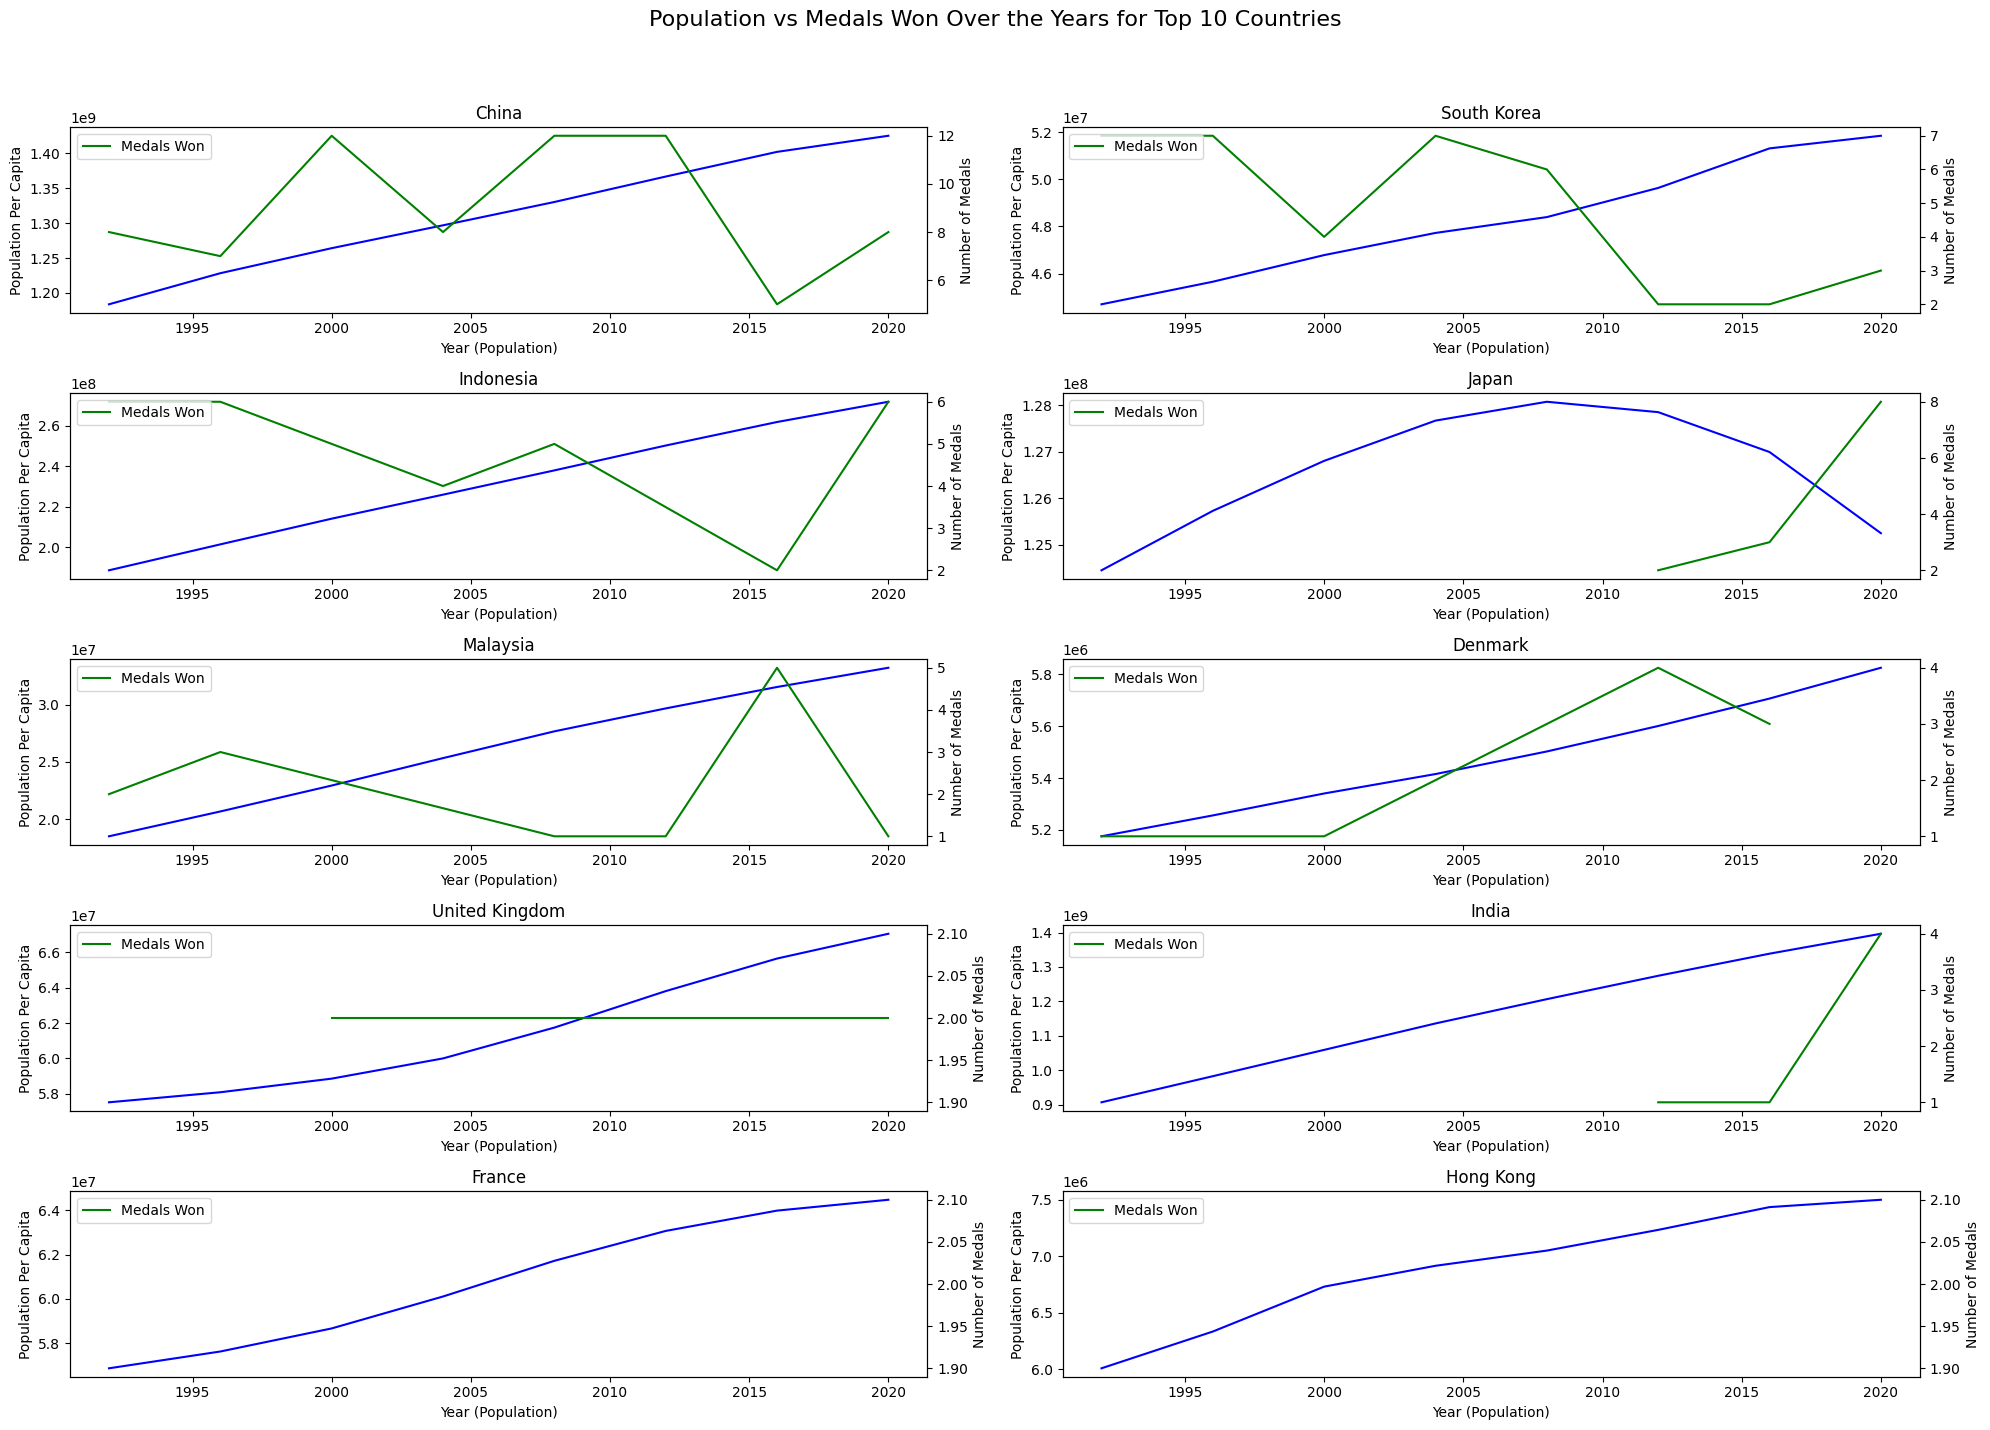

In [19]:
# Calculate the total number of medals for each country
medal_counts = df[df['Medal'] > 0].groupby('Team')['Medal'].count().reset_index()
medal_counts.columns = ['Team', 'Total_Medals']

# Select the top 10 countries by total medal counts
top_countries = medal_counts.sort_values(by='Total_Medals', ascending=False).iloc[:10]['Team']

# Plot the results
plt.figure(figsize=(20, 15))
plt.suptitle('Population vs Medals Won Over the Years for Top 10 Countries', fontsize=16)
x = 1
for country in top_countries:
    plt.subplot(5, 2, x)  # Adjust grid to 5x2 to accommodate 10 subplots
    country_data = df[df['Team'] == country]
    
    # Calculate the number of medals won each year
    medals_per_year = country_data[country_data['Medal'] > 0].groupby('Year')['Medal'].count()
    
    # Get the Population data for each year
    Population_per_year = country_data.groupby('Year')['Population'].mean()
    
    # Plotting Population and medals
    plt.plot(Population_per_year.index, Population_per_year, label='Population', color='blue')
    plt.xlabel('Year (Population)')
    plt.ylabel('Population Per Capita')
    plt.twinx()  # Create a secondary y-axis
    plt.plot(medals_per_year.index, medals_per_year, label='Medals Won', color='green')
    plt.ylabel('Number of Medals')
    plt.title(country)
    plt.legend(loc='upper left')
    
    x += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

> ## **Insight** : Population vs Medals Won
The comparison of population size to the number of medals won demonstrates that there is no straightforward correlation between the two. Countries with larger or growing populations do not necessarily win more medals. For example, despite significant population growth, countries like India and Indonesia exhibit varied performance in their medal counts, indicating that population size alone is not a decisive factor. The fluctuating trends in medal counts, despite steady population increases, further emphasize the role of other influential elements such as sports infrastructure, training quality, and supportive government policies. Japan’s case, where significant improvements in medal counts have been observed despite a declining population, highlights the effectiveness of well-designed and well-implemented sports programs and policies. This underscores the notion that a strategic focus on sports development can lead to success even in the face of demographic challenges.